# Problem

IMDB movie review sentiment classification problem. Each movie review is a variable sequence of words and the sentiment of each movie review must be classified. The IMDB Movie Review Dataset contains 25,000 highly-polar movie reviews (good or bad) for training and the same amount again for testing. The problem is to determine whether a given movie review has a positive or negative sentiment. Keras provides access to the IMDB dataset built-in. The imdb.load_data() function allows you to load the dataset in a format that is ready for use in neural network and deep learning models. The words have been replaced by integers that indicate the ordered frequency of each word in the dataset. The sentences in each review are therefore comprised of a sequence of integers.

# Why CNN with LSTM for text Classifcation

CNNs are generally used in computer vision, however they’ve recently been applied to various NLP tasks and the results were promising.
Let’s briefly see what happens when we use CNN on text data through a diagram.The result of each convolution will fire when a special pattern is detected. By varying the size of the kernels and concatenating their outputs, you’re allowing yourself to detect patterns of multiples sizes (2, 3, or 5 adjacent words).Patterns could be expressions (word ngrams?) like “I hate”, “very good” and therefore CNNs can identify them in the sentence regardless of their position.
Recurrent neural networks can obtain context information but the order of words will lead to bias; the text analysis method based on Convolutional neural network (CNN) can obtain important features of text through pooling but it is difficult to obtain contextual information which can be leverage using LSTM. So using the combination of CNN with LSTM could give us some intresting results

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from keras.datasets import imdb

#import the required library
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense,MaxPooling1D
from keras.layers import LSTM, Flatten, Dropout, Conv1D
from tensorflow.keras.layers import Embedding, Input
from keras.utils import pad_sequences
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

# Explore data and task 1

In task 1, students are asked to fill a decoded data in *Lab3_report* office word file.

In [ ]:
# load the dataset but only keep the top n words, zero the rest
top_words = 10000

import numpy as np

np.load.__defaults__=(None, True, True, 'ASCII')

# call load_data with allow_pickle implicitly set to true
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=10000)
print("Shape of train data:", X_train.shape)
print("Shape of Test data:", X_test.shape)

X_train,X_cv,y_train,y_cv = train_test_split(X_train,y_train,test_size = 0.3)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Shape of train data: (25000,)
Shape of Test data: (25000,)


In [ ]:
y_train[0:5]

array([0, 1, 1, 0, 1])

In [ ]:
print(X_train[0])

[1, 633, 13, 92, 104, 363, 2663, 26, 1183, 8, 30, 446, 22, 38, 13, 683, 98, 2, 305, 21, 14, 418, 7, 4491, 2, 9, 24, 60, 1183, 8, 30, 446, 6, 20, 3041, 4, 4414, 11, 4, 425, 10, 10, 121, 3433, 13, 380, 300, 48, 14, 218, 4, 380, 7, 2, 973, 12, 252, 9, 4, 8139, 7, 12, 2, 1722, 9, 424, 8, 297, 294, 60, 329, 74, 320, 41, 559, 442, 424, 8, 297, 35, 3070, 291, 154, 5, 59, 9, 4212, 2, 107, 10, 10, 241, 6, 527, 5, 379, 3091, 1146, 7, 1450, 5, 2323, 121, 75, 67, 1591, 105, 141, 17, 4, 2259, 9742, 2022, 2056, 4, 8492, 1652, 7, 4122, 4, 2447, 558, 452, 1233, 1652, 7, 4122, 525, 14, 22, 9, 2, 64, 11, 14, 1161, 34, 4, 5438, 2, 2155, 63, 1989, 5025, 2930, 16, 6, 212, 10, 10, 342, 45, 545, 5, 1254, 647, 8, 28, 57, 1006, 11, 6, 22, 44, 6, 58, 5, 6, 273, 121, 1006, 16, 38, 1141, 273, 262, 48, 4, 226, 1152, 9, 44, 15, 10, 10, 470, 4, 527, 2458, 10, 10, 457, 4, 2, 2, 5990, 228, 10, 10, 13, 100, 140, 23, 21, 13, 104, 14, 9, 195, 5, 13, 16, 502, 8, 97, 134, 7503, 103, 149, 14, 595, 18, 43, 320, 35, 534, 137,

In [ ]:
print("Training entries: {}, labels: {}".format(len(X_train), len(y_train)))

Training entries: 17500, labels: 17500


The review text is converted to integer values, where each integer represents a word in the dictionary. The first comment is this:

In [ ]:
len(X_train[0]), len(X_train[1])

(252, 201)

## Normalize the DATA length

In [ ]:
# truncate and pad input sequences
max_review_length = 600
X_train = pad_sequences(X_train, maxlen=max_review_length)
X_test = pad_sequences(X_test, maxlen=max_review_length)
X_cv = pad_sequences(X_cv,maxlen=max_review_length)

In [ ]:
len(X_train[0]), len(X_train[1])

(600, 600)

## Convert the training set (integer) back to words

In [ ]:
# A dictionary that maps words to integer indices
word_index = imdb.get_word_index()

# Keep the first index
word_index = {k:(v+3) for k,v in word_index.items()}
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2  # unknown
word_index["<UNUSED>"] = 3

reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
decode_review(X_train[0])

"<PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PA

Please use the generated random number below to generate a decode output. [Task1]

In [ ]:
# Generate the random number
import random
generated_num = random.randint(0,10)
print(generated_num)
decode_review(X_train[generated_num])

4


"<PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PA

In [ ]:
# Decoding the data coded data of IMDB ( Data Understanding )
index = imdb.get_word_index()
reverse_index = dict([(value, key) for (key, value) in index.items()])
decoded = " ".join( [reverse_index.get(i - 3, "#") for i in X_train[0]] )
print(decoded)

# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # usually i don't think hollywood productions are fit to be called film so i call them # instead but this piece of elephant # is not even fit to be called a movie hence the quotes in the title br br where shall i start 1 if this isn't the start of # casting it sure is the epitome of it # powers is suppo

# Construct model

## Construct LSTM model and task 2

In task 2, students are asked to select an option with better LSTM network parameters and a screenshot of their output in *Lab3_Report* office word file.

Which option is better?
* A. LSTM(100) | epochs=2 | batch_size=32
* B. LSTM(200) | epochs=5 | batch_size=64

In [ ]:
import tensorflow as tf

# The code for LSTM Based Classifcation
# Embedding layer
# LSTM Layer
# Dense Layer

## You are free to choose the hyperparameters and the number of layers
## A. LSTM(100) epochs=2 batch_size=32
## B. LSTM(200) epochs=5 batch_size=64


embedding_vector_length = 32
model = Sequential()

model.add(Input(shape=(max_review_length,)))
model.add(Embedding(input_dim=top_words, output_dim=embedding_vector_length, input_length=max_review_length))
model.add(LSTM(100))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

# Change the number of epochs and the batch size depending on the RAM Size

history = model.fit(X_train, y_train, epochs=5, batch_size=64, verbose = 1, validation_data=(X_cv,y_cv))


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)         │ (None, 600, 32)        │       320,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 100)            │        53,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 373,301 (1.42 MB)

 Trainable params: 373,301 (1.42 MB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/5
274/274 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - accuracy: 0.6314 - loss: 0.6201 - val_accuracy: 0.8225 - val_loss: 0.3895
Epoch 2/5
274/274 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - accuracy: 0.8344 - loss: 0.3821 - val_accuracy: 0.8740 - val_loss: 0.3246
Epoch 3/5
274/274 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - accuracy: 0.9196 - loss: 0.2193 - val_accuracy: 0.8761 - val_loss: 0.3191
Epoch 4/5
274/274 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.9413 - loss: 0.1691 - val_accuracy: 0.8493 - val_loss: 0.5528
Epoch 5/5
274/274 ━━━━━━━━━━━━━━━━━━━━ 8s 28ms/step - accuracy: 0.9441 - loss: 0.1599 - val_accuracy: 0.8603 - val_loss: 0.3684


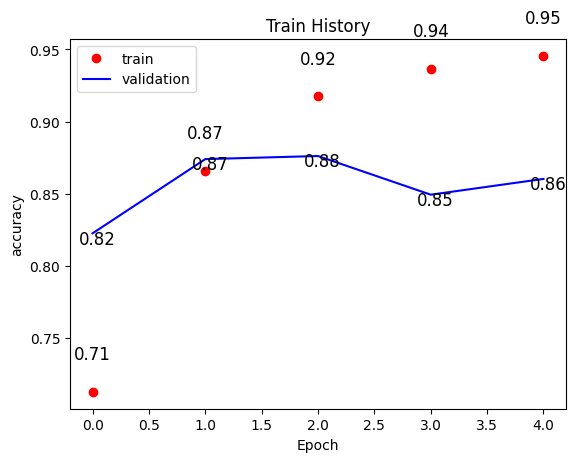

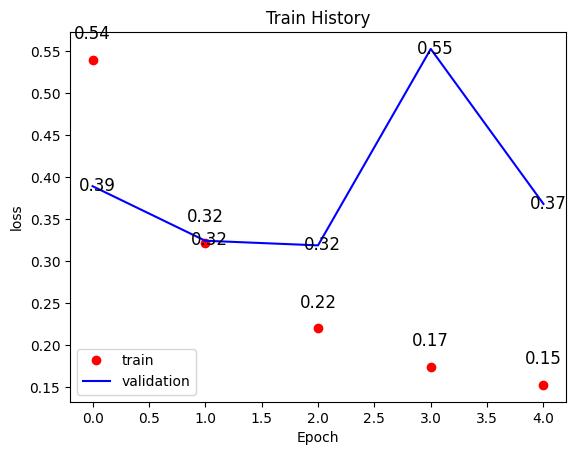

In [ ]:
# Print the Output here.

def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train], 'ro', label='Train')
    plt.plot(train_history.history[validation], 'b', label='Validation loss')
    for a, b in zip(train_history.epoch,train_history.history[train]):
        plt.text(a, b+0.02, round(b,2), ha='center', va='bottom', fontsize=12)
    for a, b in zip(train_history.epoch,train_history.history[validation]):
        plt.text(a+0.04, b-0.01, round(b,2), ha='center', va='bottom', fontsize=12)
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='best')
    plt.show()


show_train_history(history,'accuracy','val_accuracy')
show_train_history(history,'loss','val_loss')

In [ ]:
# Print the result

print('Training loss \t', round(history.history['loss'][-1],3))
print('Training accuracy ',  round(history.history['accuracy'][-1],3))
print('Validation loss ', round(history.history['val_loss'][-1],3))
print('Validation accuracy ',  round(history.history['val_accuracy'][-1],3))

Training loss 	 0.153
Training accuracy  0.946
Validation loss  0.368
Validation accuracy  0.86


In [ ]:
# Final evaluation of the model using test dataset

scores = model.evaluate(X_test, y_test, verbose=1)
print('Testing loss \t', scores[0]*100)
print('Testing accuracy ', scores[1]*100)

782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.8526 - loss: 0.3885
Testing loss 	 38.21113407611847
Testing accuracy  85.54400205612183


In [ ]:
# Check the learned model with test set

predict=model.predict(X_test)
predict_classes=np.argmax(predict,axis=1)

782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step


In [ ]:
def get_original_text(i):
    word_to_id = imdb.get_word_index()
    word_to_id = {k:(v+3) for k,v in word_to_id.items()}
    word_to_id["<PAD>"] = 0
    word_to_id["<START>"] = 1
    word_to_id["<UNK>"] = 2

    id_to_word = {value:key for key,value in word_to_id.items()}
    return ' '.join(id_to_word[id] for id in X_test[i])

In [ ]:
SentimentDict={1:'positive', 0:'negative'}
def display_test_sentiment(i):
    print(get_original_text(i))
    print('label: ', SentimentDict[y_test[i]], ', prediction: ', SentimentDict[predict_classes[i]])
display_test_sentiment(3)

<PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD

## Construct CNN+LSTM model and task 3

In task 3, students are asked to upload the **screenshot** of the modified CNN+LSTM structure in *Lab3 Report* office word file.

In [ ]:
# create the model
# Hyper-parameter 1: Change the value of embedding_vector_length
embedding_vector_length = 128
cnn_model = Sequential()
cnn_model.add(Input(shape=(max_review_length,)))

# Write the code for LSTM Based Classifcation
# Embedding layer
# Convolution-1D Layer : You are free to choose the hyperparameters and the number of layers
# LSTM Layer : You are free to choose the hyperparameters and the number of layers
# Dense Layer


cnn_model.add(Embedding(input_dim=top_words, output_dim=embedding_vector_length, input_length=max_review_length))
cnn_model.add(Conv1D(filters=128, kernel_size=3, padding='same', activation='relu'))
cnn_model.add(MaxPooling1D(pool_size=1))
# cnn_model.add(Conv1D(filters=64, kernel_size=2, padding='same', activation='relu'))
# cnn_model.add(MaxPooling1D(pool_size=1))
# Hyper-parameter 2: Change the value of LSTM(?)
cnn_model.add(LSTM(50))
cnn_model.add(Dense(units=1, activation='sigmoid'))

cnn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(cnn_model.summary())

# Hyper-parameter 3 and 4: Change the number of epochs and the batch size depending on the RAM Size
history_c=cnn_model.fit(X_train, y_train, epochs=4, batch_size=16,verbose = 1,validation_data=(X_cv,y_cv))

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_14 (Embedding)        │ (None, 600, 128)       │     1,280,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_11 (Conv1D)              │ (None, 600, 128)       │        49,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_11 (MaxPooling1D) │ (None, 600, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_14 (LSTM)                  │ (None, 50)             │        35,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,365,131 (5.21 MB)

 Trainable params: 1,365,131 (5.21 MB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/4
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 28s 24ms/step - accuracy: 0.7093 - loss: 0.5361 - val_accuracy: 0.8505 - val_loss: 0.3564
Epoch 2/4
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 41s 24ms/step - accuracy: 0.8980 - loss: 0.2697 - val_accuracy: 0.8401 - val_loss: 0.3870
Epoch 3/4
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 40s 23ms/step - accuracy: 0.9025 - loss: 0.2550 - val_accuracy: 0.8612 - val_loss: 0.3539
Epoch 4/4
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 43s 25ms/step - accuracy: 0.9556 - loss: 0.1329 - val_accuracy: 0.8697 - val_loss: 0.3695


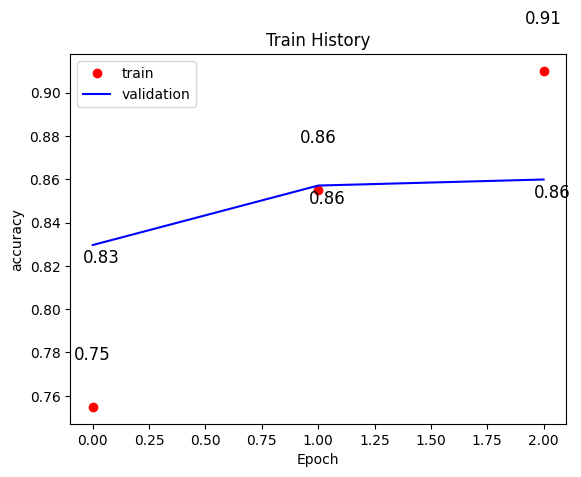

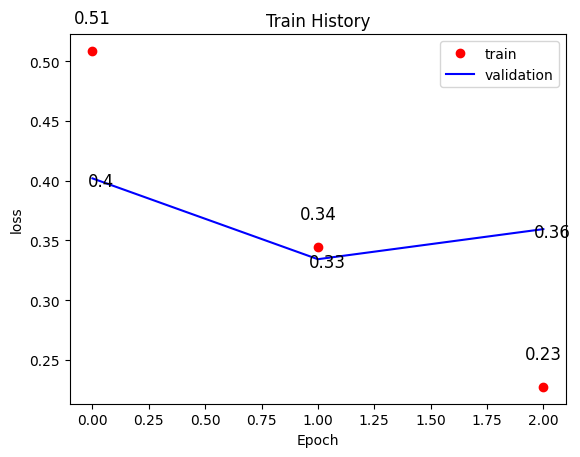

In [ ]:
# Final evaluation of the CNN + LSTM model using the test data
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train], 'ro', label='Train')
    plt.plot(train_history.history[validation], 'b', label='Validation loss')
    for a, b in zip(train_history.epoch,train_history.history[train]):
        plt.text(a, b+0.02, round(b,2), ha='center', va='bottom', fontsize=12)
    for a, b in zip(train_history.epoch,train_history.history[validation]):
        plt.text(a+0.04, b-0.01, round(b,2), ha='center', va='bottom', fontsize=12)
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='best')
    plt.show()

show_train_history(history_c,'accuracy','val_accuracy')
show_train_history(history_c,'loss','val_loss')

In [ ]:
print('Training loss \t', round(history_c.history['loss'][-1],3))
print('Training accuracy ',  round(history_c.history['accuracy'][-1],3))
print('Validation loss ', round(history_c.history['val_loss'][-1],3))
print('Validation accuracy ',  round(history_c.history['val_accuracy'][-1],3))

Training loss 	 0.137
Training accuracy  0.953
Validation loss  0.37
Validation accuracy  0.87


In [ ]:
# Final evaluation of the model using test dataset

cnn_scores = cnn_model.evaluate(X_test, y_test, verbose=1)
print('Testing loss \t', cnn_scores[0]*100)
print('Testing accuracy ', cnn_scores[1]*100)

782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.8674 - loss: 0.3682
Testing loss 	 36.35934889316559
Testing accuracy  86.86000108718872


# Compare the learned models and task 4

In task 4, students are asked to upload the **screenshot** of the result of the LSTM and CNN+LSTM model output in *Lab3 Report* office word file.

In [ ]:
#Creating a function to display values:
def show_values_on_bars(axs, h_v="v", space=0.2):
    def _show_on_single_plot(ax):
        if h_v == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height()
                value = "{:.2f}".format(p.get_height())
                ax.text(_x, _y, value, ha="center")
        elif h_v == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height()
                value = "{:.2f}".format(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

In [ ]:
!pip install seaborn

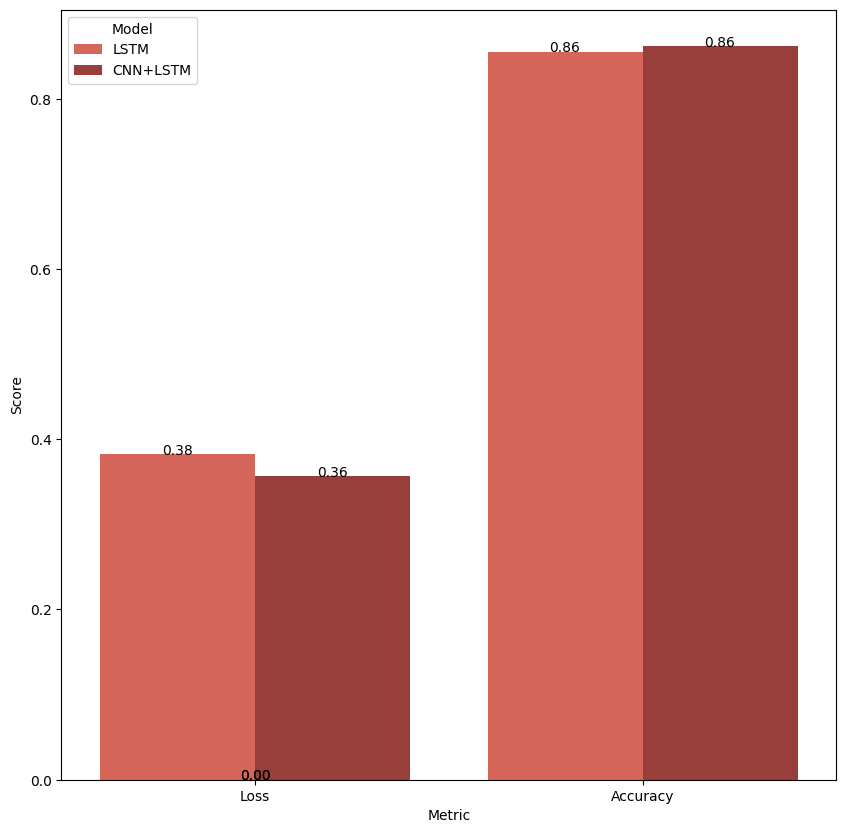

In [ ]:
#Creating a dataframe to draw out comparisons

import seaborn as sns
import pandas as pd

results=[]
results.append([scores[0], 'Loss', 'LSTM'])
results.append([scores[1], 'Accuracy', 'LSTM'])
results.append([cnn_scores[0], 'Loss', 'CNN+LSTM'])
results.append([cnn_scores[1], 'Accuracy', 'CNN+LSTM'])


comparison = pd.DataFrame(results, columns = ['Score', 'Metric', 'Model'])
plt.figure(figsize=(10,10))
plot = sns.barplot(x=comparison['Metric'],y=comparison['Score'], hue = comparison['Model'], palette="Reds_d")
show_values_on_bars(plot)